# [**Transformation des caractéristiques par hachage à l'aide d'arbres totalement aléatoires**](https://nbviewer.org/github/Franck-PepperLabs/pepper_data-science_practising/blob/main/Sklearn/examples/1_11_ensembles/plot_random_forest_embedding.ipynb)<br/>([*Hashing feature transformation using Totally Random Trees*](https://scikit-learn.org/stable/auto_examples/ensemble/plot_random_forest_embedding.html))

[**`RandomTreesEmbedding`**](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomTreesEmbedding.html?highlight=randomtreesembedding) fournit un moyen de projeter des données sur une représentation creuse de très grande dimension, ce qui pourrait être bénéfique pour la classification. La correspondance est totalement non supervisée et très efficace.

Cet exemple visualise les partitions données par plusieurs arbres et montre comment la transformation peut également être utilisée pour la réduction de dimensionnalité non linéaire ou la classification non linéaire.

Les points voisins partagent souvent la même feuille d'un arbre et partagent donc de grandes parties de leur représentation hachée. Cela permet de séparer deux cercles concentriques simplement en fonction des composantes principales des données transformées avec SVD tronqué.

Dans les espaces de grande dimension, les classifieurs linéaires atteignent souvent une excellente précision. Pour les données binaires creuses, [**`BernoulliNB`**](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html?highlight=bernoullinb#sklearn.naive_bayes.BernoulliNB) est particulièrement bien adapté. La ligne du bas compare la frontière de décision obtenue par [**`BernoulliNB`**](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html?highlight=bernoullinb#sklearn.naive_bayes.BernoulliNB) dans l'espace transformé avec une forêt [**`ExtraTreesClassifier`**](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html?highlight=extratreesclassifier) apprise sur les données d'origine.

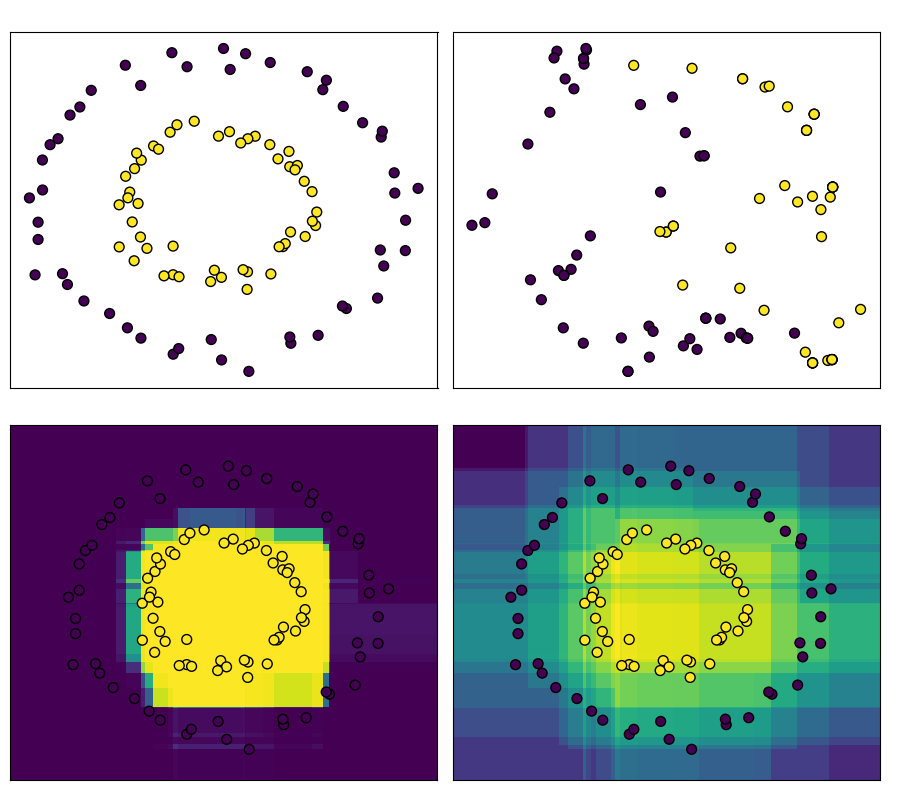

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles
from sklearn.ensemble import RandomTreesEmbedding, ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.naive_bayes import BernoulliNB

# make a synthetic dataset
X, y = make_circles(factor=0.5, random_state=0, noise=0.05)

# use RandomTreesEmbedding to transform data
hasher = RandomTreesEmbedding(n_estimators=10, random_state=0, max_depth=3)
X_transformed = hasher.fit_transform(X)

# Visualize result after dimensionality reduction using truncated SVD
svd = TruncatedSVD(n_components=2)
X_reduced = svd.fit_transform(X_transformed)

# Learn a Naive Bayes classifier on the transformed data
nb = BernoulliNB()
nb.fit(X_transformed, y)


# Learn an ExtraTreesClassifier for comparison
trees = ExtraTreesClassifier(max_depth=3, n_estimators=10, random_state=0)
trees.fit(X, y)


# scatter plot of original and reduced data
fig = plt.figure(figsize=(9, 8))

ax = plt.subplot(221)
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor="k")
ax.set_title("Original Data (2d)", c='w')
ax.set_xticks(())
ax.set_yticks(())

ax = plt.subplot(222)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=50, edgecolor="k")
ax.set_title(
    "Truncated SVD reduction (2d) of transformed data (%dd)" % X_transformed.shape[1], c='w'
)
ax.set_xticks(())
ax.set_yticks(())

# Plot the decision in original space. For that, we will assign a color
# to each point in the mesh [x_min, x_max]x[y_min, y_max].
h = 0.01
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# transform grid using RandomTreesEmbedding
transformed_grid = hasher.transform(np.c_[xx.ravel(), yy.ravel()])
y_grid_pred = nb.predict_proba(transformed_grid)[:, 1]

ax = plt.subplot(223)
ax.set_title("Naive Bayes on Transformed data", c='w')
ax.pcolormesh(xx, yy, y_grid_pred.reshape(xx.shape))
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor="k")
ax.set_ylim(-1.4, 1.4)
ax.set_xlim(-1.4, 1.4)
ax.set_xticks(())
ax.set_yticks(())

# transform grid using ExtraTreesClassifier
y_grid_pred = trees.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

ax = plt.subplot(224)
ax.set_title("ExtraTrees predictions", c='w')
ax.pcolormesh(xx, yy, y_grid_pred.reshape(xx.shape))
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor="k")
ax.set_ylim(-1.4, 1.4)
ax.set_xlim(-1.4, 1.4)
ax.set_xticks(())
ax.set_yticks(())

plt.tight_layout()
plt.show()